## Lista 7 - Exercício de Mineração de texto

#### Questão 1 

Use o dataset "tweets_trump.csv", que contém todos os tweets do D. Trump e faça o que é pedido abaixo.

a) Utilizando o texto dos tweets identifique 5 tópicos latentes com o LDA, com um preprocessamento básico -- remoção de urls, remoção de pontuação, stemming e conversão para minúsculo. 

b) Avalie os tópicos encontrados. Algum preprocessamento a mais poderia ser útil para a produção de um melhor resultado?


In [43]:
import pandas as pd
import re
import string

In [80]:
# Importar arquivo
dfTweets= pd.read_csv("tweets_trump.csv")
tweets = dfTweets['text']
tweets[0]

'Republicans and Democrats have both created our economic problems.'

In [81]:
# Remover URLS
url_pattern = r'http[s]?://\S+'
tweets = tweets[~tweets.str.match(url_pattern)]
tweets = tweets.apply(lambda x: re.sub(url_pattern, '', x))

# Converter para minúsculo
tweets = tweets.str.lower()

# remover pontuação
PONTUACAO = string.punctuation
def remove_pontuacao(text):
    return text.translate(str.maketrans('', '', PONTUACAO))

tweets = tweets.apply(lambda text: remove_pontuacao(text))

# Remover stop words
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweets = tweets.apply(lambda text: remove_stopwords(text))

# Stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

tweets = tweets.apply(lambda text: stem_words(text))

tweets

0                 republican democrat creat econom problem
1        thrill back great citi charlott north carolina...
2        rt cbsherridg read letter surveil court obtain...
3        unsolicit mail ballot scam major threat democr...
4        rt mzhemingway friendli tell event comey appar...
                               ...                        
56566    rt randpaul don’t know joebiden think continu ...
56567    rt elisestefanik presid realdonaldtrump excel ...
56568    rt teamtrump live presidenti debat debates2020...
56569    sign order support worker delphi corpor make s...
56570    suburban women want safeti amp secur joe biden...
Name: text, Length: 55265, dtype: object

In [57]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# Tópicos
dataset_prep = [d.split() for d in tweets]
dictionary_prep = Dictionary(dataset_prep)
corpus_prep = [dictionary_prep.doc2bow(doc) for doc in dataset_prep]

model_prep = LdaModel(corpus=corpus_prep, id2word=dictionary_prep, num_topics=5, iterations=100, passes=5,random_state=1)

In [58]:
for i in model_prep.show_topics(num_topics=5, num_words=6, log=False):
    print(i)
    print('---')

(0, '0.062*"rt" + 0.036*"realdonaldtrump" + 0.036*"presid" + 0.021*"trump" + 0.011*"impeach" + 0.010*"hillari"')
---
(1, '0.017*"border" + 0.016*"us" + 0.015*"amp" + 0.014*"american" + 0.013*"countri" + 0.011*"state"')
---
(2, '0.044*"thank" + 0.031*"great" + 0.022*"trump" + 0.020*"realdonaldtrump" + 0.016*"rt" + 0.010*"donald"')
---
(3, '0.027*"great" + 0.013*"big" + 0.012*"get" + 0.011*"go" + 0.010*"make" + 0.010*"time"')
---
(4, '0.020*"news" + 0.017*"fake" + 0.014*"media" + 0.012*"report" + 0.011*"amp" + 0.009*"collu"')
---


## Questão 2

Use o dataset "tweets_trump.csv" e responda:

a) Qual o sentimento dos 5 tweets com maior número de retweets?

b) Faça uma análise do sentimento geral de todos os tweets. Para isso, visualize a distribuição de polaridade para embasar a sua resposta.

In [67]:
# Importar arquivo
dfTweets= pd.read_csv("tweets_trump.csv")
dfTweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
...,...,...,...,...,...,...,...,...,...
56566,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,f
56567,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,f
56568,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,f
56569,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,f


In [71]:
tweetsMaisRts = dfTweets.nlargest(5, 'retweets')
tweetsMaisRts = tweetsMaisRts['text']
tweetsMaisRts

11759    Tonight, @FLOTUS and I tested positive for COV...
35620           #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
39347                   TODAY WE MAKE AMERICA GREAT AGAIN!
29598    Are you allowed to impeach a president for gro...
9080          RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA
Name: text, dtype: object

In [73]:
tweetsMaisRts_prep = tweetsMaisRts

# Remover URLS
url_pattern = r'http[s]?://\S+'
tweetsMaisRts_prep= tweetsMaisRts_prep[~tweetsMaisRts.str.match(url_pattern)]
tweetsMaisRts_prep = tweetsMaisRts_prep.apply(lambda x: re.sub(url_pattern, '', x))

# Converter para minúsculo
tweetsMaisRts_prep = tweetsMaisRts_prep.str.lower()

# remover pontuação
PONTUACAO = string.punctuation
def remove_pontuacao(text):
    return text.translate(str.maketrans('', '', PONTUACAO))

tweetsMaisRts_prep = tweetsMaisRts_prep.apply(lambda text: remove_pontuacao(text))

# Remover stop words
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweetsMaisRts_prep = tweetsMaisRts_prep.apply(lambda text: remove_stopwords(text))

# Stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

tweetsMaisRts_prep = tweetsMaisRts_prep.apply(lambda text: stem_words(text))

tweetsMaisRts_prep

11759    tonight flotu test posit covid19 begin quarant...
35620                                     fraudnewscnn fnn
39347                             today make america great
29598                  allow impeach presid gross incompet
9080                                     rt spacex liftoff
Name: text, dtype: object

In [75]:
from nltk.sentiment import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

print("Sem pre-processamento")
for i in tweetsMaisRts:
    print(i)
    print(sent.polarity_scores(i))
    
print("\nCom pre-processamento")
for i in tweetsMaisRts_prep:
    print(i)
    print(sent.polarity_scores(i))

Sem pre-processamento
Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We will get through this TOGETHER!
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.5983}
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
TODAY WE MAKE AMERICA GREAT AGAIN!
{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.6588}
Are you allowed to impeach a president for gross incompetence?
{'neg': 0.478, 'neu': 0.522, 'pos': 0.0, 'compound': -0.7506}
RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Com pre-processamento
tonight flotu test posit covid19 begin quarantin recoveri process immedi get togeth
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
fraudnewscnn fnn
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
today make america great
{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
allow impeach presid gross inco

In [84]:
resultados = []

for tweet in dfTweets['text']:
    polaridade = sent.polarity_scores(tweet)
    polaridade['tweet'] = tweet
    resultados.append(polaridade)

# Convertendo a lista de resultados para um DataFrame
df = pd.DataFrame(resultados)

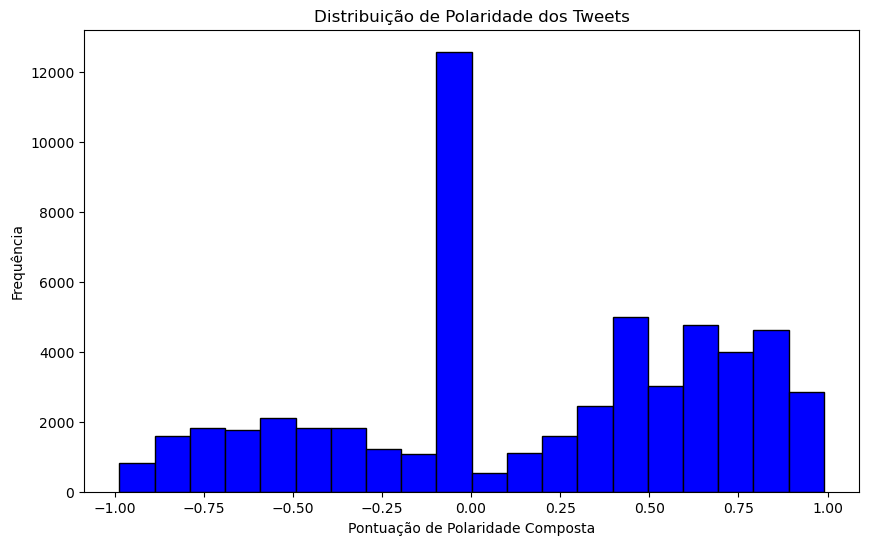

In [85]:
import matplotlib.pyplot as plt
# Plotando o histograma da pontuação de polaridade composta
plt.figure(figsize=(10, 6))
plt.hist(df['compound'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição de Polaridade dos Tweets')
plt.xlabel('Pontuação de Polaridade Composta')
plt.ylabel('Frequência')
plt.show()

É possível ver que a polaridade dos tweets tende a ser mais positiva que negativa, se vê uma grande concentração de tweets com polaridade neutra, pode ser devido a grande quantidade de retweets sem muito conteúdo agregado pelo autor.
Também foi experimentado com pré-processamento mas o resultado foi muito similar.